<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_com_Python_Estudo_de_Caso_A%C3%A7%C3%B5es_Ordin%C3%A1rias_do_Banco_do_Brasil_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**01. Fonte de dados**
---


Os dados que serão analisados foram obtidos no site do [Banco do Brasil](https://ri.bb.com.br/servicos-para-investidores/historico-de-cotacoes/), os dados baixados são referentes a ação ordinária do Banco do Brasil (BBAS3) em formato `xls` e estão disponíveis  [neste link](https://raw.githubusercontent.com/paulosrl/Datascience/master/BBAS3.SA.csv).

Nesta análise iremos utilizar os dados de um arquivo que contem os dados referentes a 01/01/2018 à 23/06/2020. Este arquivo pode ser baixado no [github](https://raw.githubusercontent.com/paulosrl/datasets/master/cotacaoAcoesOrdinariasBB2018-20.CSV) em formato `csv`.

Prefira usar, quando possível, um formato não proprietário de armazenamento como por exemplo os arquivos no formato `csv`, esse formático é bastante democrárico e pode ser utilizado em qualquer ferramenta de anaálise de dados e exportado para qualquer banco de dados.

## **Dicionário de dados / Tipo da variável**

*`Data` - dia da coleta do valor da ação (variável quantitativa contínua)

*`Abertura` - preço na abertura do dia em reais  (variável quantitativa contínua)

*`Maxima` - preço mais alto atingido no dia  (variável quantitativa contínua)

*`Minima` - menor preço atingido no dia  (variável quantitativa contínua)

*`Fechado` - preço no fechamento do dia em reais  (variável quantitativa contínua)

*`Media` - media do preço atingida no dia  (variável quantitativa contínua)

*`Variacao` - variação do preço da ação no dia em relação ao dia anterior  (variável quantitativa contínua)

*`Volume` - volume negociado no dia  (variável quantitativa discreta)

*`QuantidadeAcoes` - quantidade de ações negociadas no dia (variável quantitativa discreta)

*`Negocios` - quantidade de negócios no dia com a ação (variável quantitativa discreta)

*`VariacaoPerecentual` - variação percentual do preço da ação no dia em relação ao dia anterior (variável quantitativa contínua)

# **02. Importação dos Dados e das Bibliotecas que serão utilizadas**
---

## Verificar a infraestrutura necessária para trabalhar com os dados

* Localização do arquivo, o arquivo será local ou será acessado remotamente;
* Documentar a forma de acesso do arquivo e sua estrutura de dados;
* Documentar quais os parâmetros serão utilizados na importação dos dados, esses parâmetros podem poupar futuras necessidades de conversão de dados;
* Indentificar o formato do arquivo que será baixado;
* Verificar questões regionais como por exemplo, casas decimais utilizando "," como ponto decimal, porém para que os dados sejam interpretados como números pelo Python, eles precisam estar no formato onde as casa decimais são representadas por "."
* definir quais as bibliotecas de análise de dados serão utilizadas.

In [ ]:
#caminhop do arquivo
DATA_PATH = "https://raw.githubusercontent.com/paulosrl/datasets/master/cotacaoAcoesOrdinariasBB2018-20.csv"
# importar a biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
# importar dados utilizando como delimitador entre campos ";" e como separador decimal ","
df = pd.read_csv(DATA_PATH,
                 delimiter=";", decimal=","
                 )

# **03. Visualização dos dados e das estruturas de dados**
---

## Verificar o tamanho do arquivo (linhas e colunas) do conjunto de dados importado

In [ ]:
# mostrar o total de linhas e colunas da tabela lida
df.shape

(616, 11)

## Listar as 3 primeiras linhas do conjunto de dados, para ter uma visão geral dos dados.

In [ ]:
df.head(3)

,Data,Abertura,Maxima,Minima,Fechado,Media,Variacao,Volume,QuantidadeAcoes,Negocios,VarPercentual
0,23/06/2020,33.80,34.04,33.1,33.53,33.57,"0,0087",546881152,16289000,34455,"0,87%"
1,22/06/2020,34.21,34.42,33.0,33.24,33.64,"-0,0206",509318016,15139200,37059,"-2,06%"
2,19/06/2020,34.90,35.12,33.9,33.94,34.33,"-0,0133",697927552,20326300,42669,"-1,33%"


##Identificar o tipo de cada coluna (inteiro, float, object).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data             616 non-null    object 
 1   Abertura         616 non-null    float64
 2   Maxima           616 non-null    float64
 3   Minima           616 non-null    float64
 4   Fechado          616 non-null    float64
 5   Media            616 non-null    float64
 6   Variacao         616 non-null    object 
 7   Volume           616 non-null    int64  
 8   QuantidadeAcoes  616 non-null    int64  
 9   Negocios         616 non-null    int64  
 10  VarPercentual    616 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 53.1+ KB


# **04. Verificar se há necessidade de conversão dos dados para os tipos mais apropriados**
---


* A coluna `Variacao` precisa ser convertida para um valor numérico tipo float;
* A coluna Data precisa ser convertida para um tipo datetime, para que se tenha mais flexibilidade no tratamento dos dados;

Neste momento será necessário analisar os tipos de dados existentes no arquivo e verificar qual o melhor formato para cada coluna, é neste momento que as primeiras transformações devem ser aplicadas.

In [ ]:
# substituir vírgula por ponto na coluna Variacao
df['Variacao'] = df['Variacao'].str.replace(',', '.')

#converter de string para número a coluna Variacao
df['Variacao'] = pd.to_numeric(df['Variacao'], errors='coerce')

#converte a coluna Data para tipo datetime no Python
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

#verificar novos tipos de dados criados
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             616 non-null    datetime64[ns]
 1   Abertura         616 non-null    float64       
 2   Maxima           616 non-null    float64       
 3   Minima           616 non-null    float64       
 4   Fechado          616 non-null    float64       
 5   Media            616 non-null    float64       
 6   Variacao         610 non-null    float64       
 7   Volume           616 non-null    int64         
 8   QuantidadeAcoes  616 non-null    int64         
 9   Negocios         616 non-null    int64         
 10  VarPercentual    616 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 53.1+ KB


# **05. Resumo das informações estatísticas (sem nenhum filtro)**

##**Resumo estatístico**

Analisar:  

* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - percentil 25
* **50%** - percentil 50 (e mediana)
* **75%** - percentil 75
* **max** - maior valor da coluna

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método `describe()`.

É possível identificar de cara colunas com valores ausentes e possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [ ]:
#Resumo das informações estatísticas
df.describe()

,Abertura,Maxima,Minima,Fechado,Media,Volume,QuantidadeAcoes,Negocios
count,616.000000,616.000000,616.000000,616.000000,616.000000,6.160000e+02,6.160000e+02,616.000000
mean,41.715942,42.321201,41.007403,41.645666,41.649334,5.359479e+08,1.336137e+07,31054.650974
std,8.642648,8.616572,8.667844,8.658448,8.646051,2.510248e+08,7.182426e+06,16083.436666
min,24.200000,25.000000,21.910000,22.130000,22.510000,1.581736e+08,4.107700e+06,8348.000000
25%,33.520000,33.915000,33.075000,33.482500,33.542500,3.648886e+08,8.596600e+06,20711.750000
50%,44.000000,44.515000,43.390000,44.010000,43.895000,4.841205e+08,1.138125e+07,26501.500000
75%,48.892500,49.420000,48.300000,48.835000,48.840000,6.528132e+08,1.571250e+07,35500.750000
max,55.600000,55.910000,54.820000,55.180000,55.250000,2.170666e+09,7.397800e+07,176241.000000


# **06. Histograma das colunas numéricas do dataset (sem nenhum filtro)**
---

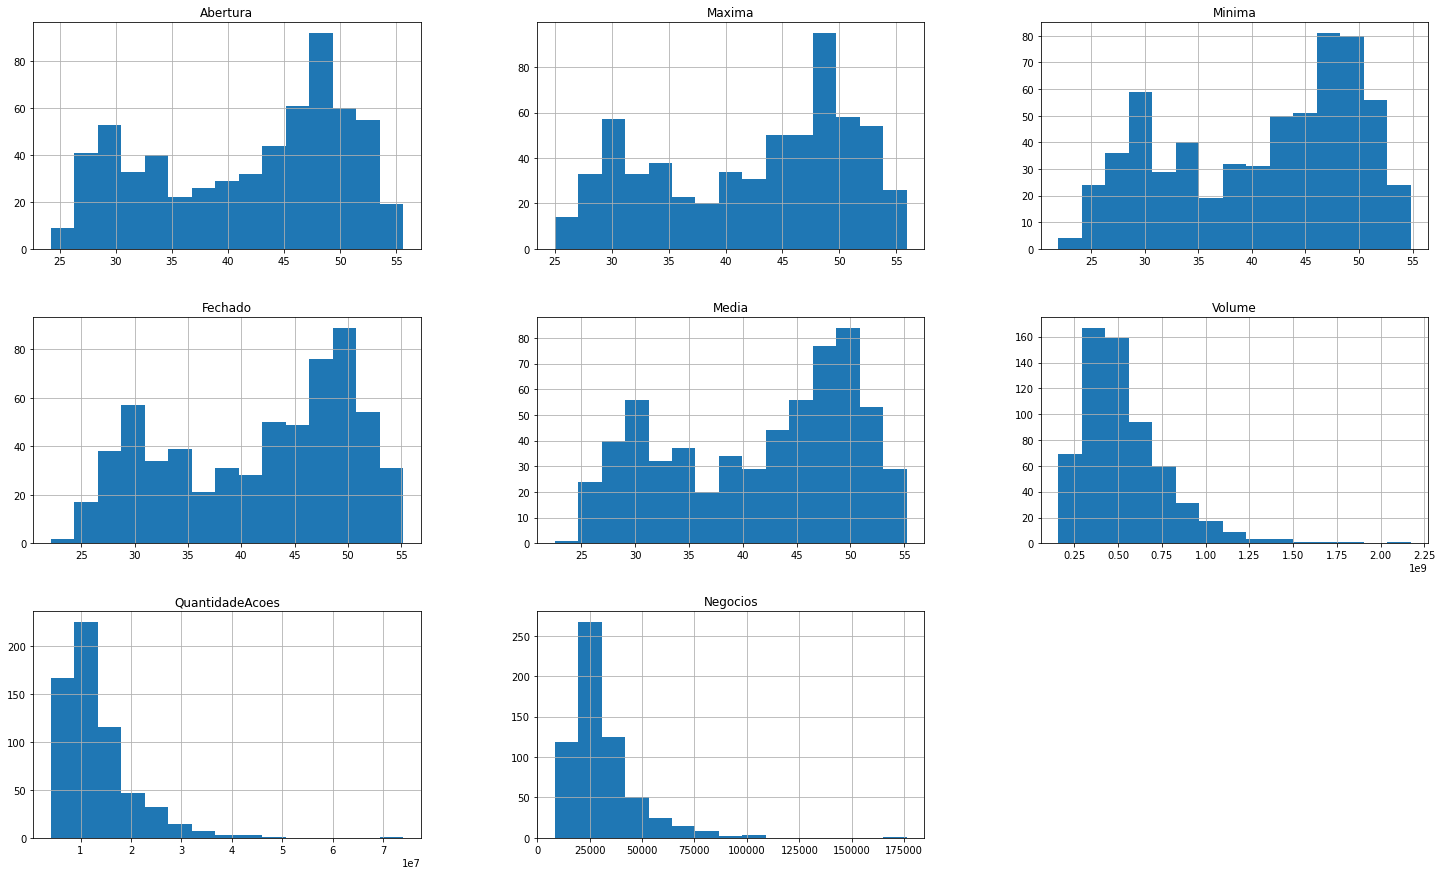

In [ ]:
# plotar o histograma das colunas numéricas
# número de barras do histograma
# figzise(largura,altura) do gráfico
df.hist(bins=15, figsize=(25,15));

# **07. Boxplots das colunas numéricas do dataset (sem nenhum filtro)**
---


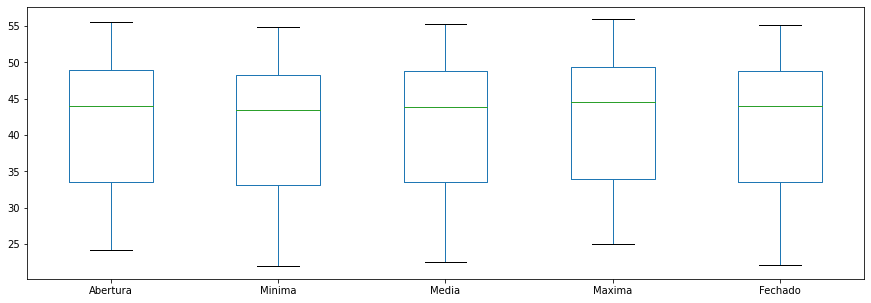

In [ ]:
#valor das ações
# Abertura, Minima, Media, Maxima, Fechado
boxplot = df.boxplot(column=['Abertura','Minima','Media','Maxima','Fechado'],grid=False,figsize=(15,5))

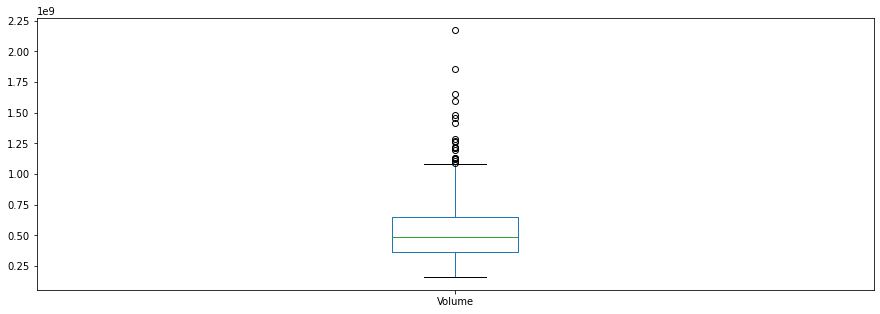

In [ ]:
#Volume
boxplot = df.boxplot(column=['Volume'],grid=False,figsize=(15,5))

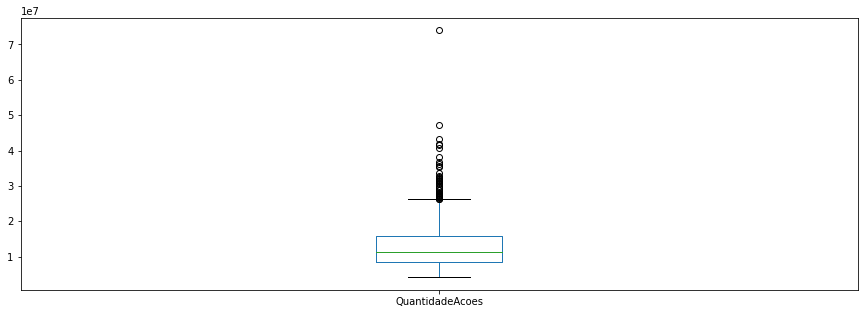

In [ ]:
#QuantidadeAcoes
boxplot = df.boxplot(column=['QuantidadeAcoes'],grid=False,figsize=(15,5))

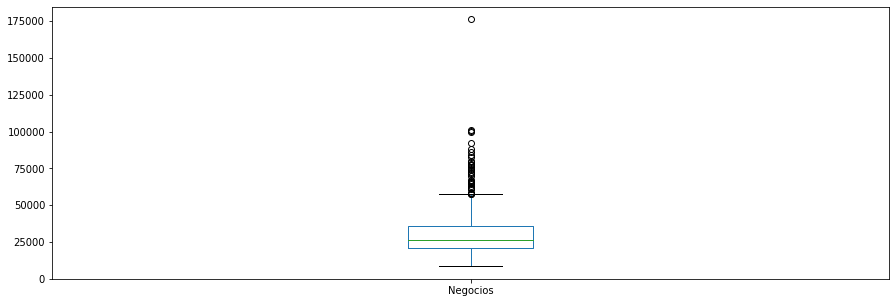

In [ ]:
#Negócios
boxplot = df.boxplot(column=['Negocios'],grid=False,figsize=(15,5))

# **08. Remoção de Outliers**
---


Para remover os outliers, é necessário analisar a amostra para verificar o que pode estar causando esses outliers, neste estudo de caso ao analisar a coluna Volume, notamos que ele apresenta uma série de outliers, é necessário investigar porque eles estão na amostra. Para isso usaremos esta coluna como referência na investigação dos outliers, esse procedimento deverá ser repetido para todas as colunas que apresentam valores suspeitos (outliers).

Esta consulta utilizará algumas funções de data, no [notebook deste link](https://github.com/softhints/python/blob/master/notebooks/pandas/Pandas_Select_rows_between_two_dates_-_DataFrame_or_CSV_file.ipynb) há maiores informações sobre como trabalhar com datas em datasets.


In [ ]:
# verificar as linhas entre '2020-01-01' e '2020-05-31'
df[df.Data.between('2020-01-01','2020-05-31')]

,Data,Abertura,Maxima,Minima,Fechado,Media,Variacao,Volume,QuantidadeAcoes,Negocios,VarPercentual
16,2020-05-29,30.50,30.85,29.75,30.84,30.33,0.0016,816918272,26926700,57680,"0,16%"
17,2020-05-28,30.61,31.46,30.21,30.79,30.84,-0.0035,639501056,20732700,49332,"-0,35%"
18,2020-05-27,31.63,31.63,30.50,30.90,30.85,0.0035,595868096,19310400,55875,"0,35%"
19,2020-05-26,32.50,32.93,30.23,30.79,31.24,-0.0225,962912896,30820300,61694,"-2,25%"
20,2020-05-25,30.00,31.50,29.80,31.50,30.81,0.1048,982729984,31886800,65443,"10,48%"
...,...,...,...,...,...,...,...,...,...,...,...
114,2020-01-08,52.76,52.99,52.04,52.12,52.44,-0.0091,1125941248,21468600,23145,"-0,91%"
115,2020-01-07,53.00,53.03,52.29,52.60,52.50,-0.0075,558561728,10638500,21753,"-0,75%"
116,2020-01-06,53.40,53.40,52.45,53.00,52.96,-0.0132,529631424,9999900,30889,"-1,32%"
117,2020-01-03,53.10,53.91,52.85,53.71,53.56,-0.0016,507042464,9465400,26899,"-0,16%"


In [ ]:
dfResumo= df[df.Data.between('2020-01-01','2020-05-31')]

In [ ]:
#Resumo das informações estatísticas após a remoção de outliers
dfResumo.describe()

,Abertura,Maxima,Minima,Fechado,Media,Variacao,Volume,QuantidadeAcoes,Negocios
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,1.030000e+02,103.000000
mean,38.135728,38.888350,37.095728,37.928641,37.953107,-0.004177,7.132698e+08,2.033719e+07,50373.349515
std,10.599952,10.437474,10.709117,10.603954,10.586993,0.054882,2.743035e+08,9.792862e+06,22928.664636
min,24.200000,25.000000,21.910000,22.130000,22.510000,-0.166800,3.144196e+08,6.435600e+06,18324.000000
25%,28.165000,29.200000,27.270000,28.145000,28.325000,-0.026450,5.210558e+08,1.350825e+07,33910.000000
50%,31.630000,32.930000,30.230000,31.500000,31.240000,-0.005300,6.213768e+08,1.902570e+07,49085.000000
75%,49.525000,50.035000,48.865000,49.455000,49.375000,0.013950,8.569952e+08,2.541730e+07,58361.000000
max,53.400000,53.970000,53.170000,53.800000,53.640000,0.171200,1.853217e+09,7.397800e+07,176241.000000


## **Histograma das colunas numéricas do dataset**

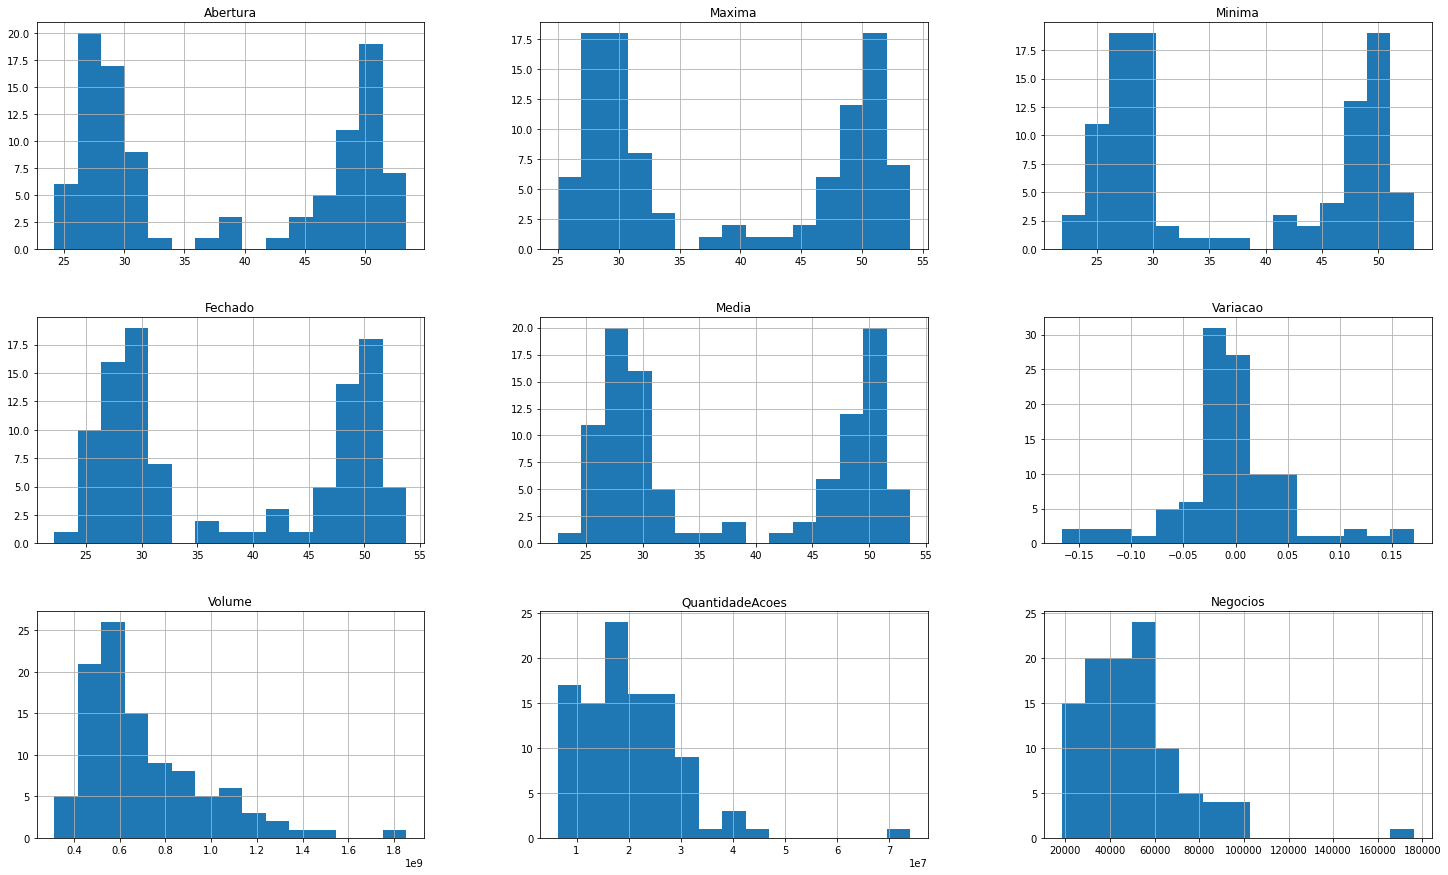

In [ ]:
# plotar o histograma das colunas numéricas
# número de barras do histograma
# figzise(largura,altura) do gráfico
dfResumo.hist(bins=15, figsize=(25,15));

## **07. Boxplot das colunas numéricas do dataset**

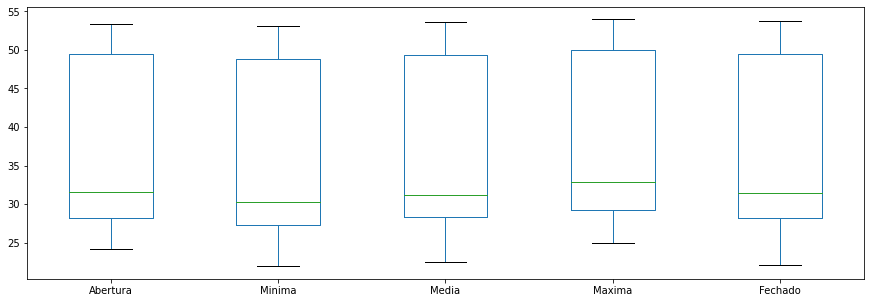

In [ ]:
#valor das ações
# Abertura, Minima, Media, Maxima, Fechado
boxplot = dfResumo.boxplot(column=['Abertura','Minima','Media','Maxima','Fechado'],grid=False,figsize=(15,5))

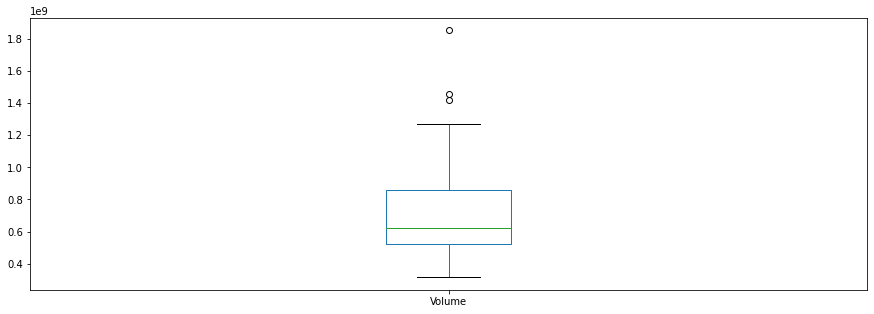

In [ ]:
#Volume
boxplot = dfResumo.boxplot(column=['Volume'],grid=False,figsize=(15,5))

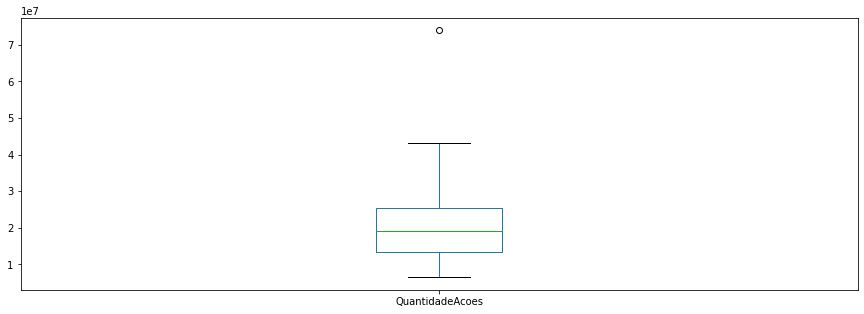

In [ ]:
#QuantidadeAcoes
boxplot = dfResumo.boxplot(column=['QuantidadeAcoes'],grid=False,figsize=(15,5))

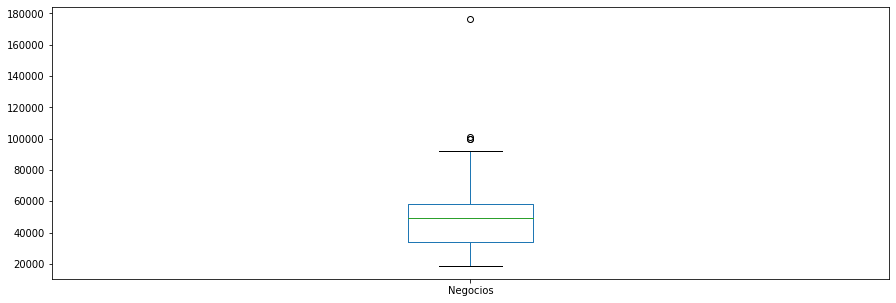

In [ ]:
#Negócios
boxplot = dfResumo.boxplot(column=['Negocios'],grid=False,figsize=(15,5))

# **09. Consultas e Gráficos**
---


## Resumo da coluna de dados referente ao valor fechado da ação

* Menor valor fechado da ação
* Maior valor fechado da ação
* Preço médio do valor de fechamento da ação
* Mediana do valor de fechamento da ação
* Desvio padrão do valor de fechamento da ação

In [ ]:
df.Fechado.min()

22.13

In [ ]:
df.Fechado.max()

55.18

In [ ]:
df.Fechado.mean()

41.645665584415596

In [ ]:
df.Fechado.median()

44.01

In [ ]:
df.Fechado.std()

8.658448229049988

## Gráfico de Linhas

Neste gráfico será feita uma comparação dos valores mínimos, máximos e de fechamento das ações.

É necessário filtrar um intervalo no dataset, para uma melhor visualização dos dados, estes dados filtrados no exemplo a seguir utilizam duas datas, uma data inicial e uma data final. Estes valores ficam armazenados em um dataset que será utilizado para plotar o gráfico.

In [ ]:
#Dicas de filtragem em datasets
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

dfGrafico = df[df.Data.between('2020-01-01','2020-03-31')]

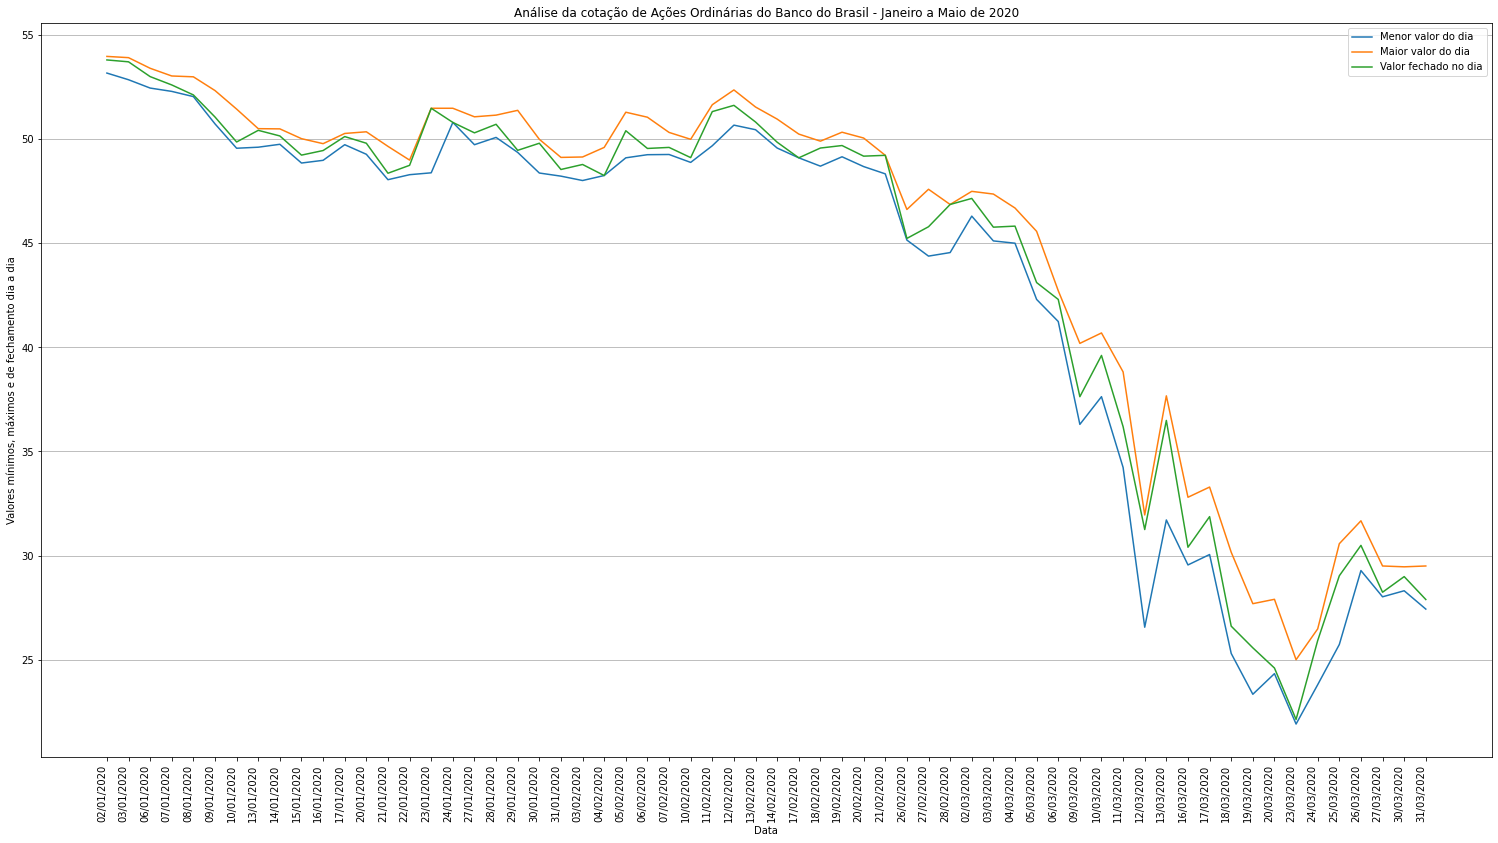

In [ ]:
# parâmetros de visuais do gráfico
vTitulo='Análise da cotação de Ações Ordinárias do Banco do Brasil - Janeiro a Maio de 2020'
vRotuloY='Valores mínimos, máximos e de fechamento dia a dia'
vRotuloX='Data'
vValorRotuloY1='Menor Valor'
vValorRotuloY2='Maior Valor'
vValorRotuloY3='Fechamento'
#ordenação do EixoX (utilizar o campo do dataset que representa a ordenação)
dfGrafico = dfGrafico.sort_values(by=['Data'], ascending=True)

#parâmetros de dados do gráfico
#Eixo X
x  = dfGrafico.Data.dt.strftime('%d/%m/%Y')
#EixoY
y1 = dfGrafico.Minima
y2 = dfGrafico.Maxima
y3 = dfGrafico.Fechado

#parâmetros de exibição do gráfico

fig, ax = plt.subplots(1, 1, figsize=(26, 15))
fig.set_facecolor("white") # cor de fundo
fig.autofmt_xdate()
ax.set_title(vTitulo)
ax.set_ylabel(vRotuloY)
ax.set_xlabel(vRotuloX)
ax.grid(axis='y')
# Legendas
plt.plot(x, y1, label='Menor valor do dia')
plt.plot(x, y2, label='Maior valor do dia')
plt.plot(x, y3, label='Valor fechado no dia')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             616 non-null    datetime64[ns]
 1   Abertura         616 non-null    float64       
 2   Maxima           616 non-null    float64       
 3   Minima           616 non-null    float64       
 4   Fechado          616 non-null    float64       
 5   Media            616 non-null    float64       
 6   Variacao         610 non-null    float64       
 7   Volume           616 non-null    int64         
 8   QuantidadeAcoes  616 non-null    int64         
 9   Negocios         616 non-null    int64         
 10  VarPercentual    616 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 53.1+ KB


#### Este portfólio foi feito tendo como base, o portfólio apresentado no curso Data Science na Prática 2.0 (Sigmoidal)

**Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---